<h3>Setup </h3>
First, import all needed libraries and instantiate the Unity Environment. Furthermore, we gonna interact with the environment a bit to get a glimpse at the data returned.

In [1]:
!pip -q install ./python
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from math import pow as power
from collections import deque
from dqn_agent import Agent

# please change the path to the downloaded environment file
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


<h3>Training</h3>
Next, we gonna train an actual agent to solve the banana collection task.<br>
In this implementation the upper limit was set to the <b>maximum of 1800 episodes</b>.<br>
Furthermore, the agent uses <b>double Q learning on top of a three layer neural network</b> (see auxiliary classes model.py and dqn_agent.py) with a decreasing epsilon over time.<br>
In several test runs the agent showed to solve the task (reaching an average score of 13 for the last 100 episodes) in <b>less than 400 episodes</b>. <br>

Episode 100	Average Score: 0.64
Episode 200	Average Score: 4.76
Episode 300	Average Score: 10.93
Episode 385	Average Score: 13.03
Environment solved in 385 episodes!	Average Score: 13.03


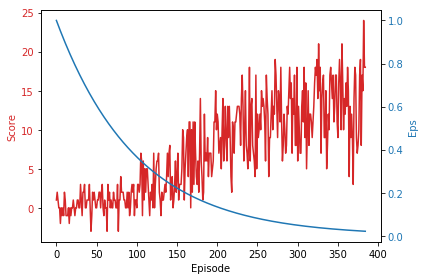

In [4]:
def dqn(n_episodes=1800, eps_start=1.0, eps_min=0.01, eps_decay=0.99):
        scores = []
        scores_window = deque(maxlen=100)
        eps_hist = []
        eps = eps_start
        
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
            state = env_info.vector_observations[0]
            score = 0

            while True:
                action = agent.get_action(state, eps)
                env_info = env.step(action)[brain_name]        # send the action to the environment
                next_state = np.array(env_info.vector_observations[0])
                reward = env_info.rewards[0]
                done = env_info.local_done[0]
                agent.step(state, action, reward, next_state, done)
                state = next_state
                score += reward
                if done:
                    break 
            scores_window.append(score)
            scores.append(score)
            
            eps_hist.append(eps)
            eps = max(eps_min, eps*eps_decay)

            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            if i_episode % 100 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

            if np.mean(scores_window)>=13.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
                break
        return scores, eps_hist
    
    
agent = Agent(state_size=state_size, action_size=action_size, seed=0, fc1_units=128, fc2_units=64, fc3_units=32)
scores, eps_hist = dqn()

# plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Score', color=color)
ax1.plot(np.arange(len(scores)), scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Eps', color=color)
ax2.plot(np.arange(len(eps_hist)), eps_hist, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()